In [1]:
import os
os.chdir("C:/Users/Zber/Documents/Dev_program/OpenRadar")

import matplotlib._color_data as mcd
from sklearn.model_selection import train_test_split
from FER.utils import MapRecord, get_label
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.colors as col
from matplotlib.lines import Line2D

tab_color = [mcd.TABLEAU_COLORS[name] for name in mcd.TABLEAU_COLORS]
extra_color = ['#acc2d9', '#56ae57', '#b2996e', '#a8ff04']
tab_color = tab_color + extra_color


def check_is_in_badfile(bad_file_list, sub, emo, idx):
    for bf in bad_file_list:
        bfname = bf.replace('\n', '').split(',')
        if sub == bfname[0] and emo == bfname[1] and idx == int(bfname[2]):
            return True
    return False


def normalize(data, is_azi=True):
    azi_para = [73.505790, 3.681510]
    ele_para = [86.071959, 5.921158]
    if is_azi:
        return (data - azi_para[0]) / azi_para[1]
    else:
        return (data - ele_para[0]) / ele_para[1]


In [3]:
tar_subs =[1, 3 , 4]
target_subjects = ['S{}'.format(i) for i in tar_subs]
npy_form = "{}.npy"
ONSET = 31
PEAK = 130
data_index = [i for i in range(0, 10)]
emotion_list = ['Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
root_path = "C:/Users/Zber/Desktop/Subjects_Heatmap"
path_list = []
labels = []
subs = []
format_string = "{}/{}_{}_{}"
with open("D:/mmFer_Data/Subjects_Heatmap_new/bad_file_list.txt") as f:
    bad_file_list = f.readlines()

for s in target_subjects:
    for e in emotion_list:
        label = get_label(e)
        for iid in data_index:
            if not check_is_in_badfile(bad_file_list, s, e, iid):
                path_list.append(format_string.format(s, e, iid, npy_form))
                labels.append(label)
                subs.append(s.replace('S', ''))

# read data into numpy
npy_data = np.zeros((len(path_list), 91, 10))

for i, path in enumerate(path_list):
    fp = os.path.join(root_path, path)
    azi_data = np.load(fp.format('azi'))
    azi_data = normalize(azi_data, is_azi=True)
    azi_data = np.mean(azi_data[ONSET:PEAK], axis=0)
    npy_data[i] = azi_data

npy_data = npy_data.reshape((len(path_list), -1))
labels = np.asarray(labels)
subs = np.asarray(subs, dtype=int)


fig, ax = plt.subplots(figsize=(10, 10))
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

markers = ["o", "^", "s"]
sizes = np.asarray([12, 15, 10]) * 5

for s in range(0, 3):
    sub_index = (subs == s)
    ax.scatter(X_tsne[sub_index, 0], X_tsne[sub_index, 1], marker=markers[s], c=labels[sub_index],
            cmap=col.ListedColormap(tab_color), s=sizes[s], label='S{}'.format(s))

# plt.tick_params(left=False, bottom=False)


legend_s = [Line2D([0], [0], marker=m, color='w', mew=3, markerfacecolor=None, markeredgecolor='black', label='S{}'.format(s),
                markersize=15) for m, s in zip(markers, range(1, 4))]

legend_c = [Line2D([0], [0], color=c, lw=6, label=e)
            for c, e in zip(tab_color[:len(emotion_list)], emotion_list)]


ax.set_ylabel("Y", fontsize=30)
ax.set_xlabel("X", fontsize=30)
ax.xaxis.labelpad = 4
ax.yaxis.labelpad = 4
legend1 = ax.legend(handles=legend_s, loc="lower center", prop={'size': 25, }, ncol=3, bbox_to_anchor=(.3, .0),
                    fancybox=True, framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.5, handlelength=0.6)
legend2 = ax.legend(handles=legend_c, loc="upper left", prop={'size': 25, }, ncol=1, bbox_to_anchor=(-0.02, 1.02),
                    fancybox=True, framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.5, handlelength=0.6)


ax.add_artist(legend1)
ax.add_artist(legend2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [4]:
def min_max(X):
    mmm = np.max(X)
    mm = np.min(X)
    X_std = (X - mm) / (mmm - mm)
    return X_std

In [5]:
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(npy_data)
X_tsne[:, 0] = min_max(X_tsne[:, 0])
X_tsne[:, 1] = min_max(X_tsne[:, 1])

c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [13]:
np.max(X_tsne[:, 1])

1.0

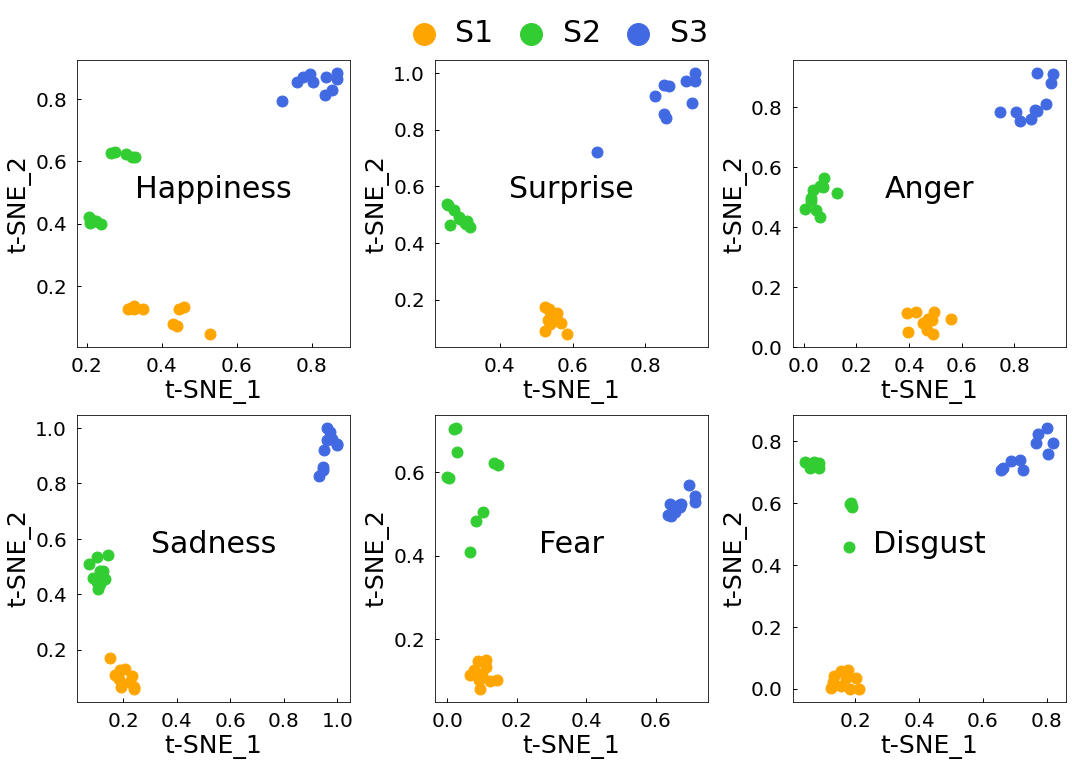

In [16]:
import matplotlib.ticker as ticker
emotion_list = ['Happiness', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
colors = ['orange', 'limegreen', 'royalblue']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    nrows=2, ncols=3, figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for l, ax in zip(range(1, 7), axes):
    for s, cc in zip(tar_subs, colors):
        sub_index = (subs == s) & (labels == l)
        if s==3:
            mm =2
        if s==4:
            mm=3
        if s==1:
            mm=1
        ax.scatter(X_tsne[sub_index, 0], X_tsne[sub_index, 1], marker='o', c=cc,
                   s=15*8, label='S{}'.format(mm))


        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.set_ylabel("t-SNE_2", fontsize=25)
        ax.set_xlabel("t-SNE_1", fontsize=25)
        ax.set_title(emotion_list[l-1], y=0.50,fontdict={'fontsize': 30})
        ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1, pad=10)
        ax.yaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1, pad=10)
        hs, ls = ax.get_legend_handles_labels()
        # ax.set_xlim(-0.1,1.1)
        # ax.set_ylim(-0.1,1.1)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))    
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))    
# plt.ylabel("t-SNE_2", fontsize=20)
# plt.xlabel("t-SNE_1", fontsize=20)

fig.legend(hs, ls, loc="upper left", markerscale=2., prop={'size': 30,},ncol=3,bbox_to_anchor=(0.35, 1.08),fancybox=True, 
           framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.5)
fig.tight_layout()
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/tsne.svg',format='svg', bbox_inches="tight")


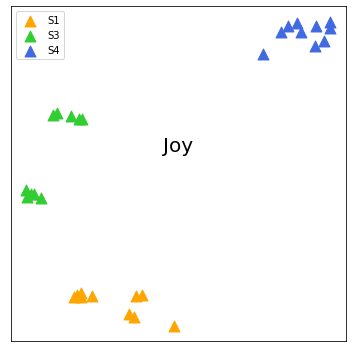

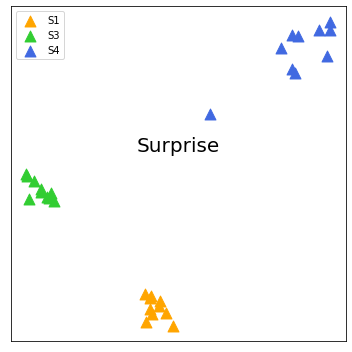

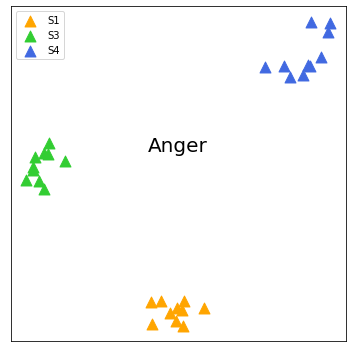

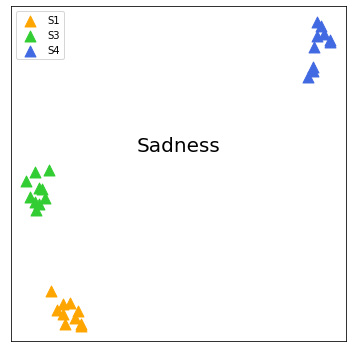

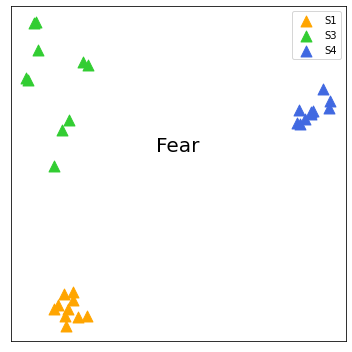

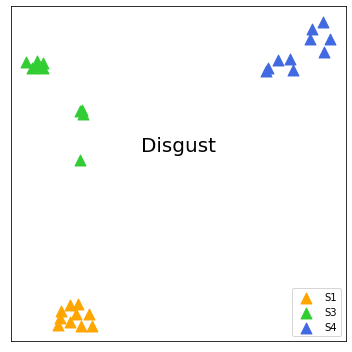

In [50]:
colors = ['orange', 'limegreen', 'royalblue']
for l, ax in zip(range(1, 7), axes):
    fig, ax= plt.subplots(figsize=(5, 5))
    for s, cc in zip(tar_subs, colors):
        sub_index = (subs == s) & (labels == l)
        ax.scatter(X_tsne[sub_index, 0], X_tsne[sub_index, 1], marker='^', c=cc,
                   s=15*8, label='S{}'.format(s))
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotion_list[l-1], y=0.55,fontdict={'fontsize': 20})
    if l == 6:
        ax.legend(loc=4)
    else:
        ax.legend(loc=0)
    plt.tight_layout()
    fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/tsne_{}.pdf'.format(emotion_list[l-1]),format='pdf', bbox_inches="tight")
